In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

path = '/Volumes/Storage/0.SAGAbackup/ARData/'

dflog = pd.read_csv(path+'eachrows_logs.tsv', 
                 sep='\t', names=['action','note','timestamp','tool','userid'])
dfuser = pd.read_csv(path + 'useranswer.csv', header=0)

np.random.seed(0)
dfuser = dfuser.reindex(np.random.permutation(dfuser.index))
dfuser.reset_index(inplace=True, drop=True)

#get max column 
#dflog2 = dflog.drop(columns=['timestamp','userid'])
#dflog2 = pd.get_dummies(dflog2, drop_first=True)
#dflog2.to_csv(path + 'al_all_cols.csv')
dfallcolumns = pd.read_csv(path + 'get_dummies_all_header.txt', nrows=1)

#free defined max # of a user log. 3714 from rnumoflogsperusr.txt
#maxn = 3714
maxn= 1180
#56 from len(dfallcolumns.columns.values)
maxcol = 56

#for fast comparision, get userid column as np 
nplog_userid = np.array(dflog['userid'].values)
# list var for indices of logs of the userid
idx_auser = []
# dataframe for a user 
dfauserlog = pd.DataFrame()
# Dataset for Keras model
X = []
# dummy var
cnt =0
#start loop with userid in lable dataset


In [17]:
rowcnt=0
X = []
Y = []
#','Jakala-TayYN','KaylidYN','SylcariYN','WroftYN'])
for index, row in dfuser.iterrows():
    if row['SubmitYN'] == 0:
        continue
    userid=row['UserId']
    #get indices of logs of the userid as list,you should put [0]
    idx_auser = np.where(nplog_userid ==userid)[0]
    
    if idx_auser.size > 1180:
        #print(userid +"\t" +str(idx_auser.size)+ "\t" + str(row['YNScore']) )
        continue
    
    rowcnt += 1
    
    Y.append([row['AkonaYN'],row['EolaniYN'],row['Jakala-TayYN'],row['KaylidYN'],row['SylcariYN'],row['WroftYN']])
    #get 'action','tool' log columns of the user as pd 
    dfauserlog = dflog.ix[idx_auser, ['action','tool']]
    #action/tool are categorical value 
    dfauserlog = pd.get_dummies(dfauserlog, drop_first=True)

    #fit to max col dataframe
    pdmaxcol = pd.DataFrame(columns=dfallcolumns.columns.values)
    #pdmaxcol = pdmaxcol.append(dfauserlog, ignore_index=True, sort=False)
    pdmaxcol = pdmaxcol.append(dfauserlog, ignore_index=True)

    pdmaxcol = pdmaxcol.fillna(0)

    #convert to np
    npnewlog = pdmaxcol.values
    
    #padding max rows
    if maxn> len(idx_auser): 
        b = np.zeros([maxn-len(idx_auser), maxcol])
        npnewlog = np.row_stack((npnewlog,b))
    X.append(npnewlog)

#finally, check X shape
print(np.array(X).shape)  
print(np.array(Y).shape)
print(rowcnt)
#Y = dataset.iloc[:,3].values

/Volumes/Storage/StorageApp/anaconda3/envs/Keras/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Volumes/Storage/StorageApp/anaconda3/envs/Keras/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


(467, 1180, 56)
(467, 6)
467


In [18]:
XX = np.array(X)
XX.shape

(467, 1180, 56)

In [19]:
# get YNscore only for submitted case
#Y = dfuser[dfuser['SubmitYN']==1]['YNScore']
#Y = dfuser[dfuser['SubmitYN']==1]
#Y = Y.loc[:,['AkonaYN','EolaniYN','Jakala-TayYN','KaylidYN','SylcariYN','WroftYN']]
Y
#coding all score>0 cases to score=1 


[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 1],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1,

In [21]:
#yy = pd.get_dummies(Y, drop_first=True)
yy = Y 

In [22]:
YY = np.array(yy)
YY.shape

(467, 6)

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest = train_test_split(XX, train_size=0.8)
ytrain, ytest = train_test_split(YY, train_size=0.8)

/Volumes/Storage/StorageApp/anaconda3/envs/Keras/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [24]:
xtrain = xtrain.reshape(-1,maxn,maxcol,1)
xtest = xtest.reshape(-1,maxn,maxcol,1)
np.save(path+'xtrain_rm_outlier', xtrain)
np.save(path+'xtest_rm_outlier', xtest)
np.save(path+'ytrain_rm_outlier', ytrain)
np.save(path+'ytest_rm_outlier', ytest)

In [68]:
showx4 = xtest[4,:,:].reshape(maxn, maxcol)
showx0 = xtest[0,:,:].reshape(maxn, maxcol)

ytest[[0,1,2,3,4,5,6,7,8,9]]

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0]])

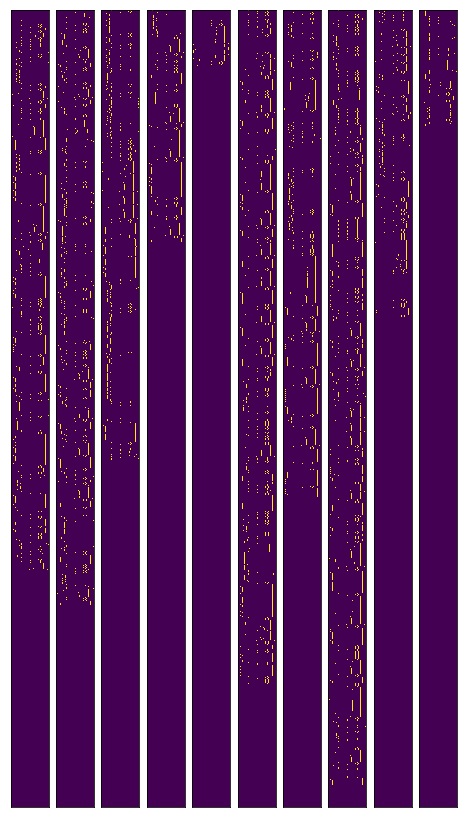

In [104]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 16))

for i in range(0,10):
    ax = fig.add_subplot(1, 10, i+1)
    showx = xtest[i+3,:,:].reshape(maxn, maxcol)
    plt.imshow(showx, interpolation="nearest")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
  

plt.show()

[0 0 1 0 0 0]
[0 0 0 0 0 1]
[1 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[0 1 0 0 0 1]
[0 0 0 0 0 0]
[0 0 0 0 0 1]
[0 0 0 0 0 0]


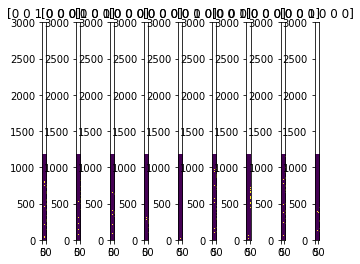

In [90]:
import matplotlib.pyplot as plt

%matplotlib inline


for i in range(1, 10):
    fig = plt.subplot(1,10,i)
    showx = xtest[i+2,:,:].reshape(maxn, maxcol)
    plt.imshow(showx, interpolation="nearest")
    plt.
    plt.title(ytest[i+2])
    print(ytest[i+2]) 
plt.show()



In [ ]:
#code end
#code end



In [59]:
dfallcolumns = pd.read_csv(path + 'get_dummies_all_header.txt', nrows=1)
dfallcolumns

,action_Change Note Name to:,action_Click,action_Click Back Button,action_Click Destination Planet,action_Click Forward Button,action_Click Go,action_Click Instrument,action_Click Left Menu,action_Click Nav Menu,action_Click Planet,...,tool_Notebook,tool_Probe Design,tool_Tool Bar,tool_conceptDB,tool_missionControl,tool_missions-db,tool_periodic-table,tool_probeDesign,tool_solar-system-db,tool_spectra


In [72]:
Y = dfuser[dfuser['SubmitYN']==1]['YNScore']
Y

0       5
1       4
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
       ..
2442    0
2449    0
2457    0
2464    0
2480    0
2486    0
2487    0
2492    0
2493    0
2516    0
2521    0
2523    0
2528    0
2545    0
2552    0
2561    0
2562    0
2575    0
2576    0
2587    0
2593    0
2597    0
2601    0
2602    0
2604    0
2608    0
2612    0
2623    0
2674    0
2685    0
Name: YNScore, Length: 535, dtype: int64

TypeError: Image data cannot be converted to float

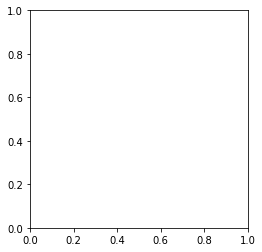

In [35]:
plt.imshow(Z[0], cmap='binary')

In [57]:
i = 0
for idx, l in enumerate(X):
    Z[idx,:,:] = l
    

ValueError: could not broadcast input array from shape (5250,56) into shape (5176,56)

In [28]:
Z[0]

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ..., 
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [62]:
dfauserlog = pd.get_dummies(dflog, drop_first=True)
dfauserlog.to_csv(path+'dfauserlog.txt', index=False)

In [61]:
dfauserlog.shape

(1381160, 56)

In [53]:
dflog['note'] = dflog['note'].apply(lambda x: re.sub(r"[^A-Za-z0-9]+", "",x))

In [54]:
dflog['note'].to_csv(path+'test.txt')

In [55]:
nplog = dflog.values


In [24]:
NP = np.empty((0,3), object)
NP = np.vstack((NP, nplog[0]))

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
nplog1 = le.fit_transform(nplog[:,1])


In [45]:
nplog

array([['Walking Through', 'ProbeDoor1', 'Gate'],
       ['Click', 'Show Tools', 'Tool Bar'],
       ['Click', 'Hide Tools', 'Tool Bar'],
       ..., 
       ['Click Left Menu', 'lander', 'missionControl'],
       ['Click Probe Button', 'Venus', 'missionControl'],
       ['Click Destination Planet', 'VENUS', 'missionControl']], dtype=object)

In [37]:
np.savetxt(path+'test.txt', nplog[:,1])

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [58]:
len(np.unique(nplog[:,1]))

9281

In [56]:
with open(path+'test2.txt', 'w') as f:
    for item in np.unique(nplog[:,1]):
        f.write("%s\n" % item)
f.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
nplog1 = le.fit_transform(nplog)
ohe = OneHotEncoder(categorical_features=[0,1,2])
nplog2 = ohe.fit_transform(nplog1).toarray()